<a href="https://colab.research.google.com/github/lkamimura/SimulacionDinamica/blob/main/Clase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalación de Octave en el entorno Colab
Se instala el programa Octave, y las librerías necesarias.

In [1]:
# !apt-get update #Usar para actualizar librerias, únicamente
from IPython import display
!apt install octave #Instala colab en el entorno de trabajo
!apt install octave python3-sympy #Instala el paquete simbólico de Octave, que incluye el Sympy de Python
display.clear_output()

In [2]:
%%writefile Inst_S.m
pkg install -forge symbolic

Writing Inst_S.m


In [3]:
!octave -W Inst_S.m #corre el código adentro de Octave pkg install -forge symbolic

For information about changes from previous versions of the symbolic package, run 'news symbolic'.


In [4]:
!pip install --user sympy==1.5.1 #Normalmente no es necesario, pero ésta versión actual de "octave-symbolic" lo exige
display.clear_output()

In [5]:
# No anda !pip install --user sympy==1.11 #Normalmente no es necesario, pero ésta versión actual de "octave-symbolic" lo exige

Se debe agregar en el .m el path donde está el Python, mediante una línea como ésta:

---


**setenv PYTHON /usr/local/bin/python**


---


para acceder al sympy desde symbolic. No obtante, puede ser diferente el path y debe verificarse en caso de que no funcione.


# Simulación numérica de un avión en piloto automático

Dado el esquema simplificado y en un punto de operación de un avión:

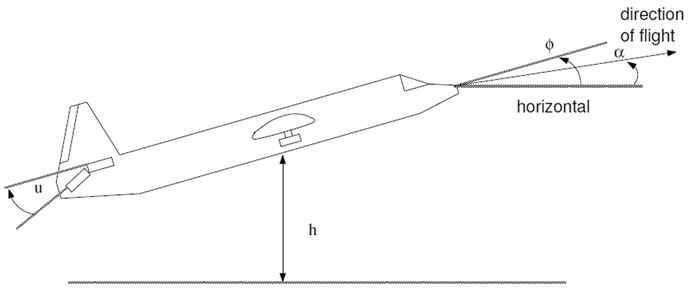

Las ecuaciones son
<!-- $(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} + m\cdot long \cdot \dot{\phi}^2 \cdot \phi -Fricc\cdot \dot{\delta}$,
$Long \cdot \ddot{\phi} = g \cdot \phi - \ddot{\delta}$ -->
$\begin{equation*}
\begin{cases}
\ \dot{\alpha}(t)=a(\phi(t) -\alpha(t))  \\
\ \ddot{\phi}(t) = -\omega ^2 (\phi (t)-\alpha (t) -b \cdot u(t)) \\
\ \dot{h}(t)=c \cdot \alpha (t)
\end{cases}
\end{equation*} \tag*{}$

donde $\omega >0$ al igual que $a$ y $b$.

Se plantea

\begin{equation}
x = \left[\begin{matrix} \alpha\\ \phi\\ \dot{\phi}\\ h\\ \end{matrix}\right];
x_0 = \left[\begin{matrix} 0\\0\\0\\0 \end{matrix} \right]
\end{equation}

\begin{equation}
\dot{x}=Ax+Bu
\end{equation}

\begin{equation}
A = \left[\begin{matrix}
\alpha & -\alpha & 0 & 0\\
0 & 0 & 1 & 0\\
\omega^2 & -\omega^2 & 0 & 0\\
c & 0 & 0 & 0\\
\end{matrix}\right];
B = \left[\begin{matrix} 0\\0\\b\omega^2\\0 \end{matrix} \right]
\end{equation}


#Resolucion numerica octave

In [14]:
%%writefile avion_num.m
clear all; clc;close all;warning('off','all');
setenv PYTHON /usr/local/bin/python %Acá está el vinculo con Pyton, para acceder al sympy desde symbolic
%/usr/bin/python

w=0.2;a=0.01;b=2;c=100;At=1e-3;tF=5;#Datos de entrada
u=1;
ii=0;
x=[0;0;0;0];#Valores iniciales

for t=0:At:tF
ii=ii+1;

alfa=x(1);
fi=x(2);
fi_p=x(3);
h=x(4);

alfa_p=a*(fi-alfa);
fi_pp=(-w^2)*(fi-alfa-b*u);
h_p=c*alfa;

xp=[alfa_p;fi_p;fi_pp;h_p];
x=x+xp*At;

x1(ii)=x(1);%alfa
x2(ii)=x(2);%fi
x3(ii)=x(3);%fi_p
x4(ii)=x(4);%h Altura
end

hfig1 = figure(1); set(hfig1, 'Visible', 'off');
t=0:At:tF;
plot(t,x2, 'linewidth', 3);hold on;
plot(t,x4, 'linewidth', 3);
title('Solucion simbolica');
legend('fi[rad]','Altura[m]')
xlabel('t[s]')
print -dpng avion_num.png
save('avion_num.mat','-v7');

Overwriting avion_num.m


ans = -8.2778


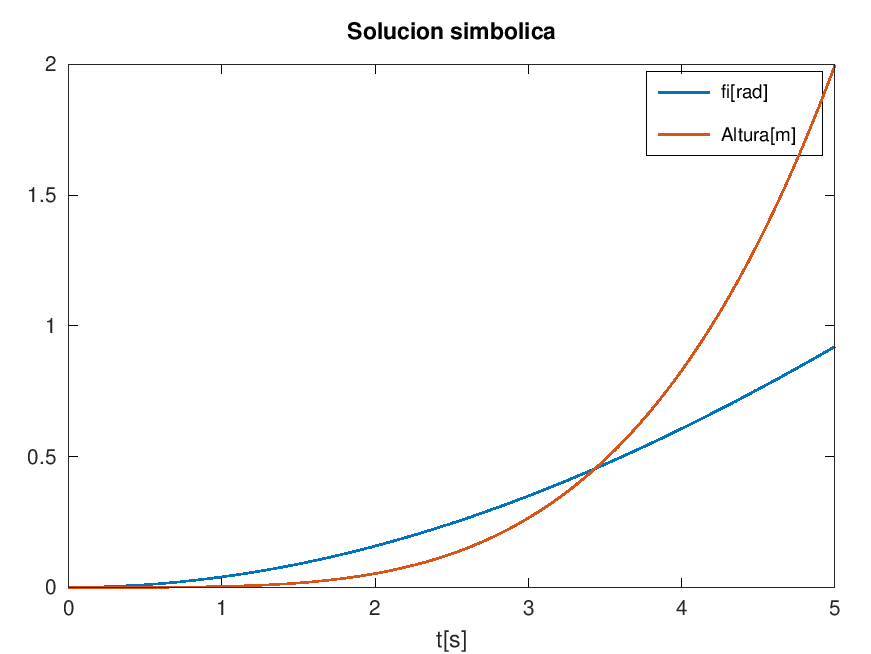

In [15]:
!octave -W avion_num.m # -W : no window system
display.Image('avion_num.png')

In [16]:
%%writefile avion_matriz.m
clear all; clc;close all;warning('off','all');
setenv PYTHON /usr/local/bin/python %Acá está el vinculo con Pyton, para acceder al sympy desde symbolic
%/usr/bin/python

w=0.2;a=0.01;b=2;c=100;At=1e-3;tF=5;#Datos de entrada
##w=0.2;a=0.01;b=2;c=50;At=1e-3;tF=20;#Datos de entrada
u=1;
ii=0;
x=[0;0;0;0];#Valores iniciales
wc=w^2;

A=[-a,a,0,0;0,0,1,0;wc,-wc,0,0;c,0,0,0];
B=[0;0;wc*b;0];

for t=0:At:tF
ii=ii+1;

xp=A*x+B*u;
x=x+xp*At;

x1(ii)=x(1);%alfa
x2(ii)=x(2);%fi
x3(ii)=x(3);%fi_p
x4(ii)=x(4);%h Altura
end

hfig1 = figure(1); set(hfig1, 'Visible', 'off');
t=0:At:tF;
subplot(2,1,1);hold on;title('Solucion numerica');
plot(t,x2, 'linewidth', 2);ylabel('x_2 fi_{[Rad]}');
subplot(2,1,2);hold on;
plot(t,x4, 'linewidth', 2);ylabel('x_4 Altura_{[m]}');
xlabel('t[s]');
print -dpng avion_matriz.png

Writing avion_matriz.m


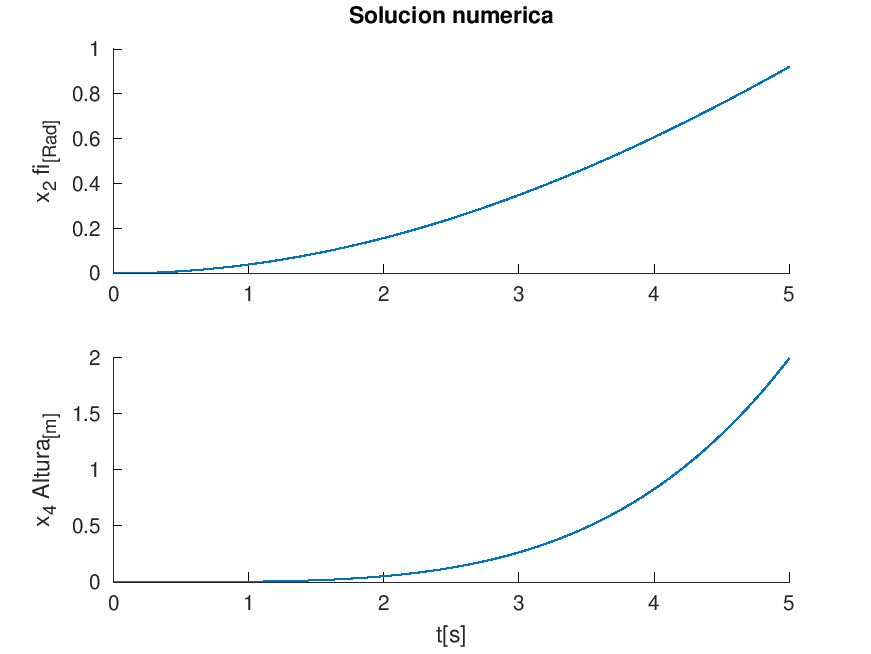

In [17]:
!octave -W avion_matriz.m # -W : no window system
display.Image('avion_matriz.png')

In [8]:
%%writefile avion_matriz3.m
clear all; clc;close all;warning('off','all');
setenv PYTHON /usr/local/bin/python %Acá está el vinculo con Pyton, para acceder al sympy desde symbolic
%/usr/bin/python

w=0.2;a=0.01;b=2;c=50;At=1e-3;tF=20;#Datos de entrada
##w=0.2;a=0.01;b=2;c=50;At=1e-3;tF=20;#Datos de entrada
u=1;
ii=0;
x=[0;0;0;0];#Valores iniciales
wc=w^2;

A=[-a,a,0,0;0,0,1,0;wc,-wc,0,0;c,0,0,0];
B=[0;0;wc*b;0];

for t=0:At:tF
ii=ii+1;

xp=A*x+B*u;
x=x+xp*At;

x1(ii)=x(1);%alfa
x2(ii)=x(2);%fi
x3(ii)=x(3);%fi_p
x4(ii)=x(4);%h Altura
end

hfig1 = figure(1); set(hfig1, 'Visible', 'off');
t=0:At:tF;
subplot(2,1,1);hold on;title('Avion');
plot(t,x2, 'linewidth', 2);ylabel('x_2 fi_{[Rad]}');
subplot(2,1,2);hold on;
plot(t,x4, 'linewidth', 2);ylabel('x_4 Altura_{[m]}');
xlabel('t[s]');
print -dpng avion_matriz3.png

Overwriting avion_matriz3.m


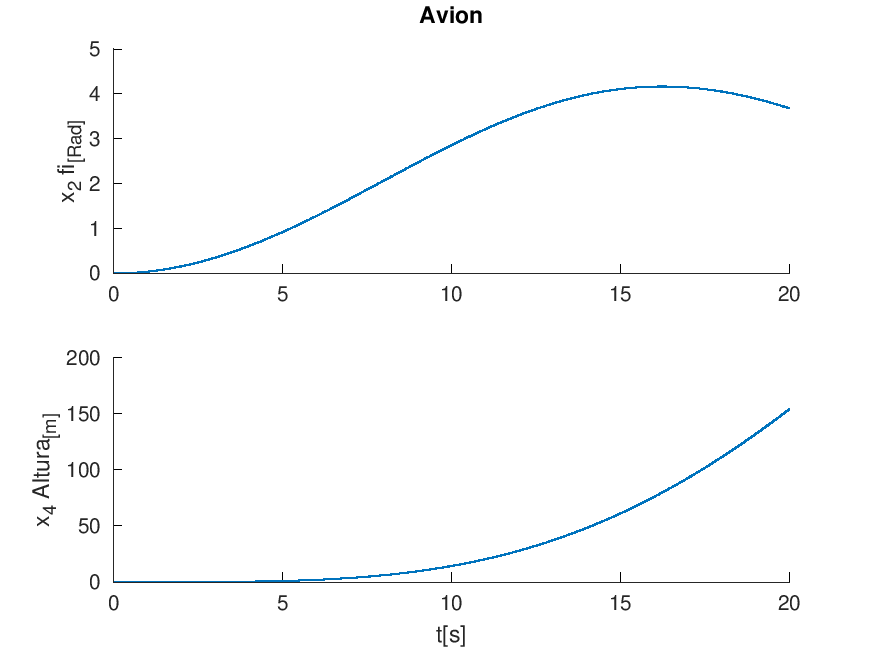

In [9]:
!octave -W avion_matriz3.m # -W : no window system
display.Image('avion_matriz3.png')

#Visualización en Colab y en Python interactiva

Se deben cargar librerías de visualización de Pyhton, como Matplotlib y Plotly. La primera es muy rápida y la segunda permite hacer zoom en alguna zona de interés.

In [ ]:
import numpy as np
import scipy.io
import pandas as pd
from matplotlib import pyplot as plt
import plotly.graph_objects as go

In [ ]:
#Importa los datos que se generaron desde Octave en el archivo .mat
mat = scipy.io.loadmat('/content/avion_num.mat')
t=mat.get('t')
x2=mat.get('x2')
x4=mat.get('x4')
df = pd.DataFrame({'t': t[0], 'Angulo fi': x2[0], 'x4': x4[0]})
df.tail(3) #Verificar que sea correcto y consistente el DataFrame

,t,Angulo fi,x4
4998,4.998,0.919736,1.991592
4999,4.999,0.920074,1.993156
5000,5.000,0.920411,1.994721


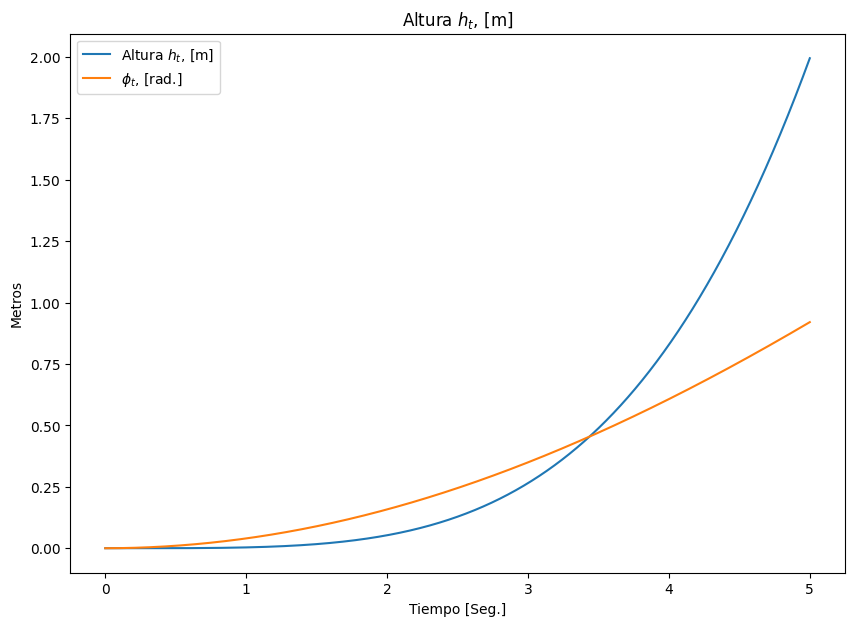

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(df['t'], df['x4'], label='Altura $h_t$, [m]')
plt.plot(df['t'],df['Angulo fi'], label='$\phi_t$, [rad.]')
plt.title('Altura $h_t$, [m]')
plt.xlabel('Tiempo [Seg.]')
plt.ylabel('Metros')
plt.legend()
plt.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['Angulo fi'], mode='lines', name='Ángulo $\phi_t$'))
fig.add_trace(go.Scatter(x=df.index, y=df['x4'], mode='lines', name='Altura $h_t$'))
# Customize the layout
fig.update_layout(title='Simulación del avión',
                  xaxis_title='Tiempo [Seg.]',
                  yaxis_title='Valores',
                  legend_title='Variables',
                  showlegend=True)
# Display the interactive Plotly chart
fig.show()